### Oumarghad Abdelaziz

In [2]:
import numpy as np
from scipy.spatial import distance
import networkx as nx
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
from xml.dom import minidom

In [11]:
class PageRank:
    def __init__(self, alpha =0.85, epsilon = 10**-6):
        pass   
# Page rank using adjacency matrix          
    def Pr_adj_matrix(self, Adj_matrix, alpha =0.85, epsilon = 10**-6):

        P = np.zeros((Adj_matrix.shape[0], Adj_matrix.shape[1]))
        for i in range(Adj_matrix.shape[0]):
            for j in range(Adj_matrix.shape[0]):
                if np.sum(Adj_matrix[i, :]) != 0: 
                    P[i][j] = (alpha*A[i][j]/np.sum(Adj_matrix[i, :])) + (1-alpha)*1/Adj_matrix.shape[0]
                else:
                    P[i][j] = 1/Adj_matrix.shape[0]
        
        R0 = np.zeros((1, Adj_matrix.shape[0]))
        for i in range(Adj_matrix.shape[0]):
            R0[0][i]= 1/Adj_matrix.shape[0]
        R_old = R0
        R_new = 0
        i=0
        while True:
            R_new = np.dot(R_old, P)
            t = distance.euclidean(R_new.flatten(), R_old.flatten())
            R_old = R_new
            i+=1
            if t <= epsilon :
                break 
        return [R_new, i]
# Page rank using transposition  matrix        
    def Pr_tans_matrix(self, transition_matrix, alpha =0.85, epsilon = 10**-6):
        R0 = np.zeros((1, transition_matrix.shape[0]))
        for i in range(transition_matrix.shape[0]):
            R0[0][i]= 1/transition_matrix.shape[0]
        R_old = R0
        R_new = 0
        i=0
        while True:
            R_new = np.dot(R_old, transition_matrix)
            t = distance.euclidean(R_new.flatten(), R_old.flatten())
            R_old = R_new
            i+=1
            if t <= epsilon :
                break 
        return [R_new, i]
# Page rank using graph matrix        
    def PR_Graph(self,graph):
        adj_matrix = nx.to_numpy_matrix(graph)
        PR = self.Pr_adj_matrix(np.array(adj_matrix))
        return PR
# Page rank using xml file         

    def PR_XML(self, path, alpha = 0.85, eps = 10.0e-6):
        # Getting the current directory of the  file xml
        file_name_dir = os.path.abspath(path)
        xml = minidom.parse(file_name_dir)
        # a list of nodes:
        nodes = [node.attributes['id'].value for node in xml.getElementsByTagName('node')]
        # a list of edges:
        edges = [(edge.attributes['source'].value, edge.attributes['target'].value) for  edge in xml.getElementsByTagName('edge')]
        G=nx.DiGraph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        PR =self.PR_Graph(G)
        return PR

<function matplotlib.pyplot.show(close=None, block=None)>

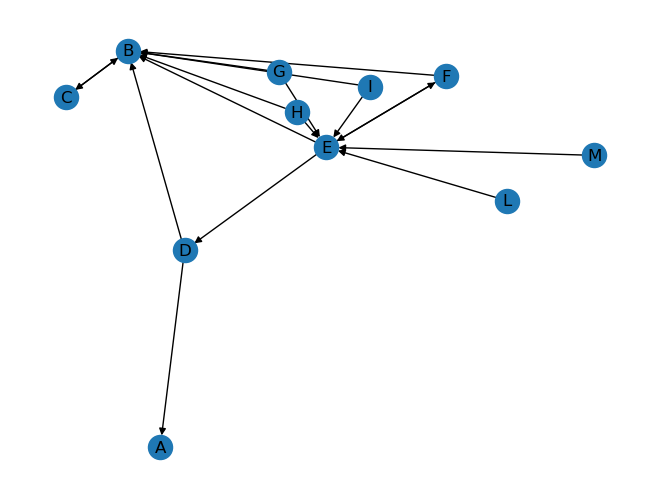

In [12]:
#Test on the course example 
A =np.array([[0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0],
     [1,1,0,0,0,0,0,0,0,0,0],[0,1,0,1,0,1,0,0,0,0,0],[0,1,0,0,1,0,0,0,0,0,0],
     [0,1,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,0,0,0,0,0,0],[0,1,0,0,1,0,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0]])
#A  method that returns transition matrix using adjacency matrix
def transition_matrix(Adj_matrix, alpha =0.85):
        P = np.zeros((Adj_matrix.shape[0], Adj_matrix.shape[1]))
        for i in range(Adj_matrix.shape[0]):
            for j in range(Adj_matrix.shape[0]):
                if np.sum(Adj_matrix[i, :]) != 0: 
                    P[i][j] = (alpha*A[i][j]/np.sum(Adj_matrix[i, :])) + (1-alpha)*1/Adj_matrix.shape[0]
                else:
                    P[i][j] = 1/Adj_matrix.shape[0]
        return P
B = transition_matrix(A)
#Creating a graph for testing PR_Graph method
nodes = ["A", "B", "C", "D", "E", "F", "G","H","I","L","M"]
edges = [('D','A'),('B','C'),('C','B'),('D','B'),
                  ('E','D'),('E','B'),('F','B'),('G','B'),
                  ('E','F'),('F','E'),('I','E'),('I','B'),
                  ('H','E'),('H','B'),('L','E'),('M','E'),('G','E')]
G = nx.DiGraph()
for k in nodes:
    G.add_node(k) 
G.add_edges_from(edges)

nx.draw(G, with_labels = True)
plt.show

In [13]:
#Creating an object from the class PageRank for testing our functions
my_pr = PageRank()
pr_u_adj = my_pr.Pr_adj_matrix(A)
pr_u_trs = my_pr.Pr_tans_matrix(B)
pr_u_graph = my_pr.PR_Graph(G)
print(pr_u_adj)


[array([[0.03278149, 0.38440123, 0.34291001, 0.03908709, 0.08088569,
        0.03908709, 0.01616948, 0.01616948, 0.01616948, 0.01616948,
        0.01616948]]), 79]


In [14]:
print(pr_u_trs)


[array([[0.03278149, 0.38440123, 0.34291001, 0.03908709, 0.08088569,
        0.03908709, 0.01616948, 0.01616948, 0.01616948, 0.01616948,
        0.01616948]]), 79]


In [15]:
print(pr_u_graph)


[array([[0.03278149, 0.38440123, 0.34291001, 0.03908709, 0.08088569,
        0.03908709, 0.01616948, 0.01616948, 0.01616948, 0.01616948,
        0.01616948]]), 79]


In [18]:
pr_xml = my_pr.PR_XML(r"C:\Users\hp\Desktop\S3\web mining\PR.xml")
print(pr_xml)

[array([[0.03278149, 0.38440123, 0.34291001, 0.03908709, 0.08088569,
        0.03908709, 0.01616948, 0.01616948, 0.01616948, 0.01616948,
        0.01616948]]), 79]
